#### EXERCÍCIO 1

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

np.random.seed(42) # define the seed (important to reproduce the results)

data = pd.read_csv('data/vertebralcolumn-2C.csv', header=(0))
data = data.dropna(axis='rows') #remove NaN
data = data.to_numpy()
nrow,ncol = data.shape
y = data[:,-1]
X = data[:,0:ncol-1]

scaler = StandardScaler().fit(X)
X = scaler.transform(X)

p = 0.2 # fraction of elements in the test set
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = p, random_state = 42)

In [21]:
np.random.seed(42) # define the seed (important to reproduce the results)

data = pd.read_csv('data/vertebralcolumn-2C.csv', header=(0))
data = data.dropna(axis='rows') #remove NaN

data = data.to_numpy()
nrow,ncol = data.shape
y = data[:,-1]
X = data[:,0:ncol-1]

scaler = StandardScaler().fit(X)
X = scaler.transform(X)

from sklearn.model_selection import train_test_split
p = 0.2 # fraction of elements in the test set
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = p, random_state = 42)

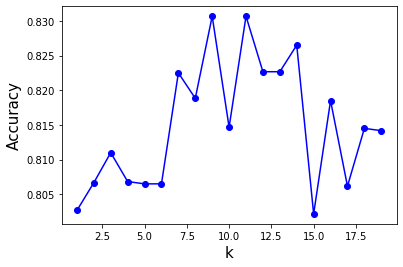

Melhor k: 9


In [22]:
nkf = 10 #number of folds
vk = [] # armazena os valores de k
vscore = []
for k in range(1, 20):
    model = KNeighborsClassifier(n_neighbors=k, metric = 'euclidean')
    # realiza a validação cruzada
    cv = cross_validate(model, x_train, y_train, cv=nkf)
    #print('k:', k, 'accurace:', cv['test_score'].mean())
    vscore.append(cv['test_score'].mean()) 
    vk.append(k)

plt.plot(vk, vscore, '-bo')
plt.xlabel('k', fontsize = 15)
plt.ylabel('Accuracy', fontsize = 15)
plt.show(True)
best_k = np.argmax(vscore)+1
print('Melhor k:', best_k)

#### EXERCÍCIO 2

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

np.random.seed(42) # define the seed (important to reproduce the results)

data = pd.read_csv('data/vertebralcolumn-2C.csv', header=(0))
data = data.dropna(axis='rows') #remove NaN

data = data.to_numpy()
nrow,ncol = data.shape
y = data[:,-1]
X = data[:,0:ncol-1]

scaler = StandardScaler().fit(X)
X = scaler.transform(X)

from sklearn.model_selection import train_test_split
p = 0.2 # fraction of elements in the test set
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = p, random_state = 42)

In [24]:
from mlxtend.plotting import plot_decision_regions

model = LogisticRegression(solver = 'lbfgs', multi_class = 'auto', max_iter = 1000)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
print('Acurácia: ', model.score(x_test, y_test))


Acurácia: 0.8709677419354839


#### EXERCÍCIO 3

In [26]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
print('Accuracy: ', model.score(x_test, y_test))

Accuracy:  0.7903225806451613


#### EXERCÍCIO 4

In [27]:
np.random.seed(42) # define the seed (important to reproduce the results)

data = pd.read_csv('data/Vehicle.csv', header=(0))
data = data.dropna(axis='rows') #remove NaN

data = data.to_numpy()
nrow,ncol = data.shape
y = data[:,-1]
X = data[:,0:ncol-1]

scaler = StandardScaler().fit(X)
X = scaler.transform(X)

p = 0.2 # fraction of elements in the test set
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = p, random_state = 42)

In [28]:
from sklearn.naive_bayes import BernoulliNB

models = [
    ('knn10', KNeighborsClassifier(10, metric = 'euclidean')),
    ('knn05', KNeighborsClassifier(5, metric = 'euclidean')),
    ('gaussianNB', GaussianNB()),
    ('bernoulliNB', BernoulliNB()),
    ('logreg', LogisticRegression(solver = 'lbfgs', multi_class = 'auto', max_iter = 1000))
]


for name, model in models:
    model.fit(x_train, y_train)
    print('Accuracy ({}): \t{}'.format(name, model.score(x_test, y_test)))

Accuracy (knn10): 	0.7294117647058823
Accuracy (knn05): 	0.7647058823529411
Accuracy (gaussianNB): 	0.5
Accuracy (bernoulliNB): 	0.48823529411764705
Accuracy (logreg): 	0.7941176470588235


#### EXERCÍCIO 5

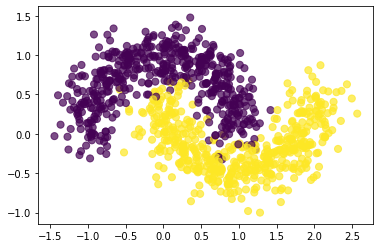

In [29]:
from sklearn import datasets

np.random.seed(42) # define the seed (important to reproduce the results)
plt.figure(figsize=(6,4))
n_samples = 1000
data  = datasets.make_moons(n_samples=n_samples, noise=.2, random_state = 42)
X = data[0]
y = data[1]
plt.scatter(X[:,0], X[:,1], c=y, cmap='viridis', s=50, alpha=0.7)
plt.show(True)

scaler = StandardScaler().fit(X)
X = scaler.transform(X)
p = 0.2 # fraction of elements in the test set
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = p, random_state = 42)

Accuracy (knn10): 	0.99


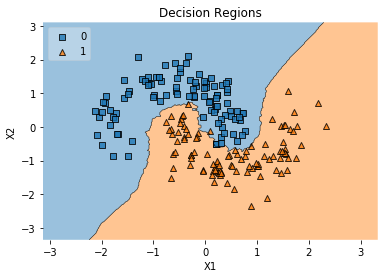

Accuracy (knn05): 	0.98


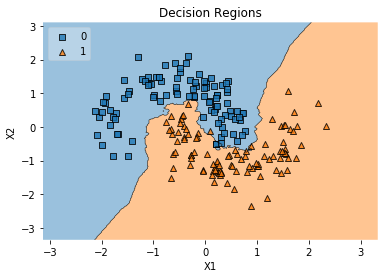

Accuracy (gaussianNB): 	0.855


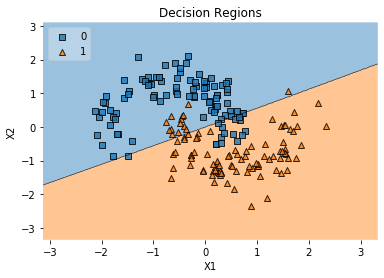

Accuracy (bernoulliNB): 	0.835


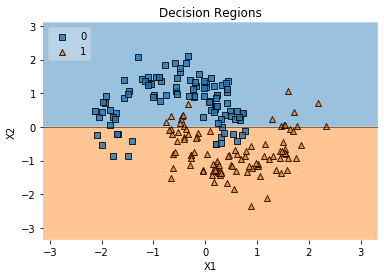

Accuracy (logreg): 	0.855


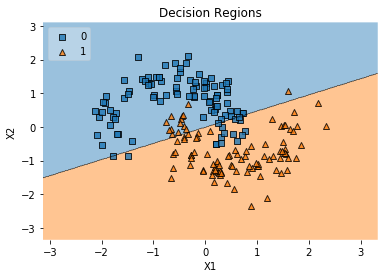

In [31]:
for name, model in models:
    model.fit(x_train, y_train)
    print('Accuracy ({}): \t{}'.format(name, model.score(x_test, y_test)))
    # Plotting decision regions
    plot_decision_regions(x_test, y_test, clf=model, legend=2)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title('Decision Regions')
    plt.show()
